# Lecture 5: Introduction to Network Analysis

**Lecturer: Primoz Konda**

**Course: Natural Language Processing and Network Analysis**

**Date: 15.10.2024**

## Agenda for today:
- What are networks and why do we need them?
- Basic structures of relational data
- Construction of networks and mesurements
- Simple network visualizations
- Similarity Graph
- Bipartite Graph

## Networks 

<img src="https://sds-aau.github.io/SDS-master/00_media/networks_google_apple.png" alt="Image" width="500">

- Networks are a way of representing interactions among some
kind of units:
    - In the case of social and economic networks, these units
(**nodes**) are usually individuals or firms.

    - The connections between them (links) can represent any of a
wide range of relationships: friendship, business relationship,
communication channel, etc.




## The basic jargon

<img src="./images/graphwords.png" alt="Image" width="500">

- The elements of a a **network** or **graph** are commonly referred to as nodes (system theory jargon) or vertices (graph theory jargon) of a graph.
- The connections are **edges** or **links**.

## Types of networks

-   Networks are a form of representing **relational data**.
-   This is a very general tool that can be applied to many different
    types of relationships between all kind of elements.
-   The content, meaning, and interpretation for sure depends on what
    elements we display, and which types of relationships. For example:
-   In Social Network Analysis:
    -   Nodes represent actors (which can be persons, firms and other
        socially constructed entities)
    -   Edges represent relationships between this actors (friendship,
        interaction, co-affiliation, similarity ect.)
-   Other types of network
    -   Chemistry: Interaction between molecules
    -   Computer Science: The world-wide-web, inter- and intranet
        topologies
    -   Biology: Food-web, ant-hives

The possibilities to depict relational data are manifold. For example:

Relations among persons
- Kinship: mother of, wife of...
- Other role based: boss of, supervisor of...
- Affective: likes, trusts...
- Interaction: give advice, talks to, retweets...
- Affiliation: belong to same clubs, shares same interests...

Relations among organizations
- As corporate entities, joint ventures, strategic alliances
- Buy from / sell to, leases to, outsources to
- Owns shares of, subsidiary of
- Via their members (Personnel flows, friendship...)

## Relational data-structures

### Edgelist

-   Common form of storing real-life relational data (eg. in relational
    databases)
-   An **edgelist** is a dataframe that contains a minimum of two
    columns, one of *nodes* that are the source of a connection and
    another that are the target of the connection.
-   The nodes in the data are typically identified by unique IDs.
-   If the distinction is not meaningful, the network is **undirected**
    (more on that later).
-   If the distinction between source and target is meaningful, the
    network is **directed**.
-   Can also contain additional columns that describe **attributes** of
    the edges such as a magnitude aspect for an edge, meaning the graph
    is **weighted** (e.g., number of interactions, strenght of
    friendship).

Edgelist:
Anna - Bente
Anna - Cindy
Anna - David
Anna - Ester
Anna - Frede
Ester - Frede
Frede - Gerwin


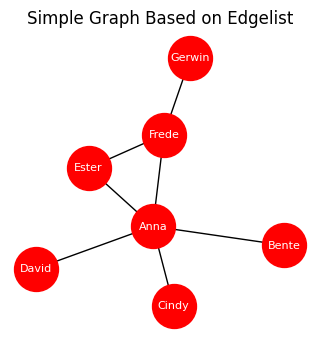

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

edgelist = [
    ('Anna', 'Bente'),
    ('Anna', 'Cindy'),
    ('Anna', 'David'),
    ('Anna', 'Ester'),
    ('Anna', 'Frede'),
    ('Ester', 'Frede'),
    ('Frede', 'Gerwin')]

# Create a graph using networkx
G = nx.Graph()
G.add_edges_from(edgelist)

# Display the edgelist
print("Edgelist:")
for edge in edgelist:
    print(f"{edge[0]} - {edge[1]}")

# Plot the graph using Matplotlib
plt.figure(figsize=(3, 3))
nx.draw(G, with_labels=True, node_color='red', node_size=1000, font_size=8, font_color='white', edge_color='black')
plt.title("Simple Graph Based on Edgelist")
plt.show()

In [2]:
# Create the adjacency matrix from the graph
adj_matrix = nx.adjacency_matrix(G).todense()
from IPython.display import display, HTML

# Print "Adjacency Matrix" as a large title using HTML
display(HTML('<h1 style="font-size:24px;">Adjacency Matrix:</h1>'))
# Print the adjacency matrix
print("\n\n\n\n")
print(adj_matrix)






[[0 1 1 1 1 1 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1]
 [0 0 0 0 0 1 0]]


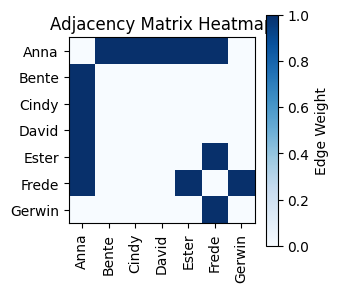

In [3]:
# Visualize the adjacency matrix as a heatmap
plt.figure(figsize=(3, 3))
plt.title("Adjacency Matrix Heatmap")
plt.imshow(adj_matrix, cmap='Blues', interpolation='none')
plt.colorbar(label="Edge Weight")
plt.xticks(ticks=range(len(G.nodes())), labels=G.nodes(), rotation=90)
plt.yticks(ticks=range(len(G.nodes())), labels=G.nodes())
plt.show()

### Nodelists

-   Edgelists as well as adjacency matrices only stores connectivity
    pattern between nodes, but due to their structure cannot store
    informations on the nodes in which we might be interested.
-   Therefore, we in many cases also provide a a **node list** with
    these informations (such as the names of the nodes or any kind of
    groupings).

 id name       gender   group
  ---- ---------- -------- -------
     1 Anna       F        A
     2 Bente      F        B
     6 Cindy      F        A
     7 David      M        B
     8 Ester      F        B
     9 Frede      M        A
    10 Gerwin     M        B

### Graph Objects - Difference between Tabular and Graph data

**Tabular data:**
- In tabular data, summary statistics of variables are between observations (column-wise) interdependent, meaning changing a value of some observation will change the corresponding variables summary statistics.

- Likewise, variable values might be within observation interdependent (row-wise), meaning changing a variable value might change summary statistics of the observation

- Otherwise, values are (at least mathematically) independent.



**Graph data:**
- Same holds true, but adittional interdependencies due to the relational structure of the data.

- Sepperation between node and edge data, which is interdependent. Removing a node might alos impy the removal of edges, removal of edges changes the characteristics of nodes. In adittion, the relational structure makes that not only true for adjacent nodes and edges, but potentially multiple. Adding/Removing one node/edge could change the characteristics of every single other node/edge.

- That is less of a problem for local network characteristics (eg., a node's degree on level 1). However, many node and edge characteristics such.

- That's mainly why graph computing is slightly more messy, and need own mathematical tools, and applications from graphical computing (graphical like graph, not like figure)

## Network analysis and measures

<img src="./images/barabasi1.png" alt="Image" width="800">

Often, we are interested in ways to summarize the pattern of node
    connectivity to infer something on their characteristics.


## Centralities

-   One of the simplest concepts when computing node level measures is
    that of centrality, i.e. how central is a node or edge in the graph.

-   As this definition is inherently vague, a lot of different
    centrality scores exists that all treat the concept of "central" a
    bit different.

We in the following well briefly illustrate the idea behind three of the
most popular centrality measures, namely:

1.  Degree centrality

2.  Eigenvector centrality

3.  Betweenness centrality

### 1. Degree centrality

<img src="./images/barabasi2.png" alt="Image" width="800">






**The degree centrality** is probably the most intuitive measure of a node's importance. It simply counts the number of edges that are adjacent to a node.

Formally, the degree centrality of a node $i$ is the sum of the edges $e_{ij}$ between node $i$ and other nodes $j$ in a network with $n$ total nodes:

$$
c^{dgr}_{i} = \sum\limits_{j=1}^{n} e_{ij} \quad \text{where} \quad i \neq j
$$

In this formula:
- $c^{dgr}_{i}$ is the degree centrality of node $i$.
- $e_{ij}$ is 1 if there is an edge between nodes $i$ and $j$, and 0 otherwise.
- The sum counts the number of edges connected to node $i$, excluding itself (i.e., $i \neq j$).


### 2. Eigenvector centrality

<img src="./images/barabasi3.png" alt="Image" width="800">

**Eigenvector centrality** takes the idea of characterizing nodes by their importance in a network further.  
The basic idea is to weight a node's degree centrality by the centrality of the nodes adjacent to it (and their centrality in turn by their centrality).  
The eigenvector here is just a clever mathematical trick to solve such a recurrent problem.

$$
c^{ev}_{j} = \frac {1}{\lambda} \sum_{t \in M(i)} x_{t} = \frac {1}{\lambda} \sum_{t \in G} a_{i,t} x_{t}
$$

In this formula:
- $c^{ev}_{j}$ is the **eigenvector centrality** of node $j$.
- $ \lambda $ is the **eigenvalue** associated with the eigenvector centrality.
- $M(i)$ is the **set of neighbors** of node $i$.
- $a_{i,t}$ represents the **adjacency matrix element** between nodes $i$ and $t$. It's 1 if there is an edge between them and 0 otherwise.
- $x_t$ is the **eigenvector centrality** of node $t$ (a neighbor of $i$).

The eigenvector centrality assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of a given node than equal connections to low-scoring nodes.



### 3. Betweenness centrality

<img src="./images/barabasi4.png" alt="Image" width="800">

- The betweenness centrality of a node measures the extent to which it lies on short paths.

- A higher betweenness indicates that it lies on more short paths and hence should somehow be important for traversing between different parts of a network

- How many pairs of individuals would have to go through you in order to reach one another in the minimum number of hops?


**Betweenness centrality**

$$
c^{btw}_{j} = \sum_{s,t \in G} \frac{ \Psi_{s,t}(i) }{\Psi_{s,t}}
$$


where vertices \(s,t,i\) are all different from each other

-   $\Psi\_{s,t}$ denotes the number of shortest paths (geodesics)
    between vertices $s$ and $t$
-   $\Psi\_{s,t}(i)$ denotes the number of shortest paths
    (geodesics) between vertices $s$ and $t$ **that pass through
    vertex** $i$.
-   The geodesic betweenness $B_n$ of a network is the mean of
    $B_n(i)$ over all vertices $i$

## Neighborhood of a Node

Lastly, we can look at the surrounding of a node, meaning the ones it is
connected to, its **neighborhood**. Here, we can look at the
**ego-network of a node**. That means how many nodes are in a certain
**geodesic distance**. Plainly speaking, how many nodes are not more
than x-steps away.

![](https://sds-aau.github.io/SDS-master/00_media/networks_distance.jpg)

## Clustering (Community detection)

-   Another common operation is to group nodes based on the graph
    topology, sometimes referred to as *community detection* based on
    its commonality in social network analysis.
-   The main logic: Form groups which have a maximum
    *within-connectivity* and a minimum *between-connectivity*.
-   Consequently, nodes in the same community should have a higher
    probability of being connected than nodes from different
    communities.

## Example: The Louvain Algorithm

![](https://sds-aau.github.io/SDS-master/00_media/networks_louvain.jpg)


-   I will illustrate the idea using the **Louvain Method**, one of the
    most widely used community detection algorithms.
-   It optimises a quantity called modularity:

$$
\sum_{ij} \left(A_{ij} - \lambda P_{ij}\right) \delta(c_i, c_j)
$$

$A$ - The adjacency matrix

$P\_{ij}$ - The expected connection between $i$ and $j$.

$\lambda$ - Resolution parameter

Can use lots of different forms for $P\_{ij}$ but the standard one
is the so called configuration model:

$$
P\_{ij} = \frac{k_i k_j}{2m}
$$



Loosely speaking, in an iterative process it

1.  You take a node and try to aggregate it to one of its neighbours.
2.  You choose the neighbour that maximizes a modularity function.
3.  Once you iterate through all the nodes, you will have merged few
    nodes together and formed some communities.
4.  This becomes the new input for the algorithm that will treat each
    community as a node and try to merge them together to create bigger
    communities.
5.  The algorithm stops when it's not possible to improve modularity any
    more.

This is the original paper, for those interested in further reads:

-   Blondel, Vincent D; Guillaume, Jean-Loup; Lambiotte, Renaud;
    Lefebvre, Etienne (9 October 2008). "Fast unfolding of communities
    in large networks". Journal of Statistical Mechanics: Theory and
    Experiment. 2008 (10): P10008

<img src="./images/cluster1.png" alt="Image" width="800">


<img src="./images/cluster2.png" alt="Image" width="800">


## (Global) Network structure

Finally, it is often also informative to look at the overal
characteristics of the network. We will do this in more detail next
time, but just so you know:

-   The **density** of a measure represents the share of all connected
    to all possible connections in the network
-   **Transistivity**, also called the **Clustering Cofficient**
    indicates how much the network tends to be locally clustered. That
    is measured by the share of **closed triplets**. Again,w e will dig
    into that next time.
-   The **diameter** is the longest of the shortest paths between two
    nodes of the network.
-   The **mean distance**, or **average path lenght** represents the
    mean of all shortest paths between all nodes. It is a measure of
    diffusion potential within a network.

![](https://sds-aau.github.io/SDS-master/00_media/networks_ccoeff.png)

## Summing up

In this session we talked about:

1.  What are networks and why might it be interesting to study them.
2.  What are commong datastructures to represent networks.
3.  What are basic definitions and concepts relevant for network
    analysis
4.  What are common measures of local network structure?
5.  What are common measures of global network structure?

## Further readings

Textbooks

-   Jackson, Matthew O. Social and economic networks. Princeton
    university press, 2010.
-   Wasserman, Stanley, and Katherine Faust. Social network analysis:
    Methods and applications. Vol. 8. Cambridge university press, 1994.
-   Powell, Walter W., and Stine Grodal. "Networks of innovators."
    Chapter in: The Oxford handbook of innovation" (2005).

Good research papers utulizing network analysis

-   Phelps, Corey, Ralph Heidl, and Anu Wadhwa. "Knowledge, networks,
    and knowledge networks: A review and research agenda." Journal of
    management 38.4 (2012): 1115-1166.
-   Rakas, Marija, and Daniel S. Hain. "The state of innovation system
    research: What happens beneath the surface?." Research Policy 48,
    no. 9 (2019): 103787.
-   Fleming, Lee, Charles King III, and Adam I. Juda. "Small worlds and
    regional innovation." Organization Science 18.6 (2007): 938-954.
-   Hidalgo, César A., et al. "The product space conditions the
    development of nations." Science 317.5837 (2007): 482-487.
-   Giuliani, Elisa, and Martin Bell. "The micro-determinants of
    meso-level learning and innovation: evidence from a Chilean wine
    cluster." Research policy 34.1 (2005): 47-68.
-   Balland, Pierre-Alexandre, et al. "Smart specialization policy in
    the European Union: relatedness, knowledge complexity and regional
    diversification." Regional Studies 53.9 (2019): 1252-1268.
-   Jurowetzki, Roman and Daniel S. Hain. Mapping the (r-) evolution of
    technological fields-- a semantic network approach. In Luca M.
    Aiello and Dan McFarland, editors,SocialInformatics, volume 8851
    ofLecture Notes in Computer Science, pages 359--383. Springer
    International Publishing, 2014.


## Network / Graph concepts & terminology

Before we start creating graphs, lets fix some more terminology related
to graphs. Some of them might sound unintuitive by now, but we will come
back to that later.

-   The vertices `u` and `v` are called the end vertices of the edge
    `(u,v)`
-   If two edges have the same end vertices they are `Parallel`
-   An edge of the form `(v,v)` is a `loop`
-   A Graph is `simple` if it has no parallel edges and loops
-   A Graph is said to be `Empty` if it has no edges. Meaning `E` is
    empty
-   A Graph is a `Null` Graph if it has no vertices. Meaning `V` and `E`
    is empty
-   Edges are `Adjacent` if they have a common vertex. Vertices are
    `Adjacent` if they have a common edge
-   The `degree` of the vertex `v`, written as `d(v)`, is the number of
    edges with v as an end vertex. By convention, we count a loop twice
    and parallel edges contribute separately
-   `Isolated` Vertices are vertices with degree 1.
-   A Graph is `Complete` if its edge set contains every possible edge
    between ALL of the vertices
-   A `Walk` in a Graph`G = (V,E)` is a finite, alternating sequence of
    the form ViEiViEi consisting of vertices and edges of the graph `G`
-   A `Walk` is `Open` if the initial and final vertices are different.
    A `Walk` is `Closed` if the initial and final vertices are the same
-   A `Walk` is a `Path` if ANY vertex is appear atmost once (Except for
    a closed walk)

In [4]:
# Helper function to visualize the graph with descriptions
def plot_graph_with_description(G, walk_edges, title, description, example):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=14, 
            connectionstyle='arc3, rad = 0.2', arrows=True)  # Adding curvature to the edges
    
    # Highlight the walk edges
    nx.draw_networkx_edges(G, pos, edgelist=walk_edges, edge_color='red', width=3, connectionstyle='arc3, rad = 0.2', arrows=True)
    
    plt.title(title)
    plt.show()

    # Print the description and example
    print(f"Description: {description}")
    print(f"Example: {example}")
    print("-" * 80)

# Create a graph G = (V, E)
G = nx.Graph()

# Add vertices
vertices = ['A', 'B', 'C', 'D', 'E']
G.add_nodes_from(vertices)

# Add edges
edges = [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'A'), ('A', 'C')]
G.add_edges_from(edges)

import warnings
warnings.filterwarnings("ignore")



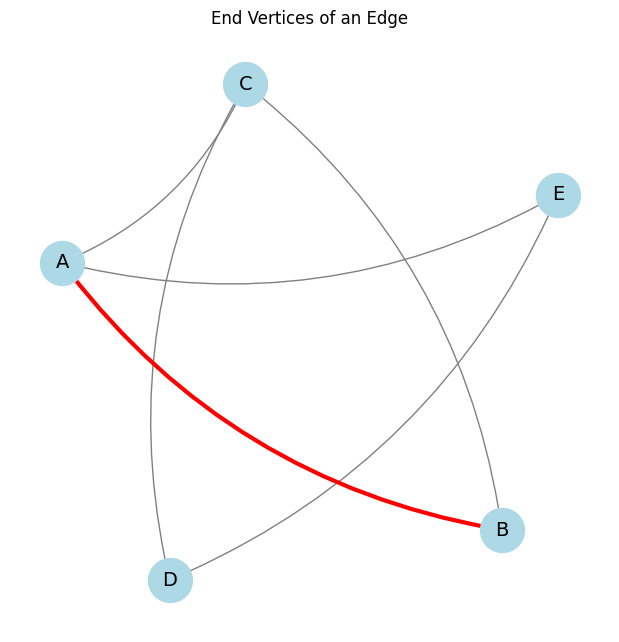

Description: The vertices u and v are called the end vertices of the edge (u,v).
Example: Edge (A, B) has end vertices A and B.
--------------------------------------------------------------------------------


In [5]:
# Example 1: End vertices of an edge
edge = [('A', 'B')]
plot_graph_with_description(
    G, 
    edge, 
    "End Vertices of an Edge", 
    "The vertices u and v are called the end vertices of the edge (u,v).", 
    "Edge (A, B) has end vertices A and B."
)
warnings.filterwarnings("ignore")


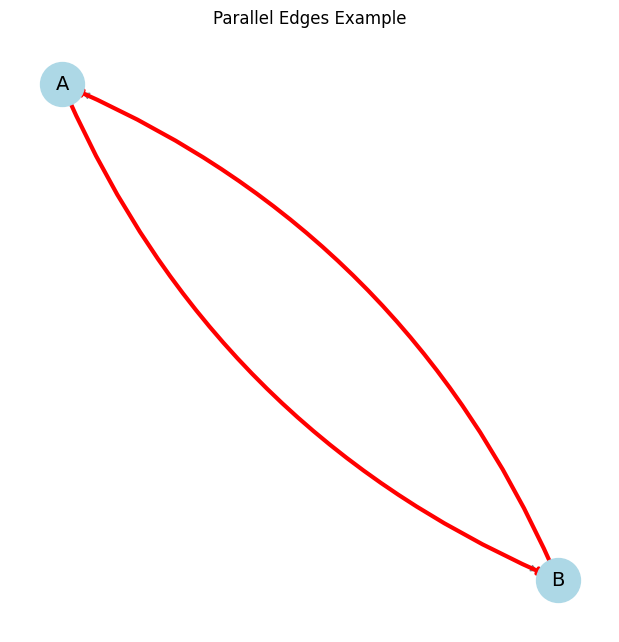

Description: Two edges are parallel if they have the same end vertices.
Example: Two edges between vertices A and B with different edge lengths (2 and 3).
--------------------------------------------------------------------------------


In [6]:
# Example 2: Parallel Edges
G_parallel = nx.MultiDiGraph()  # Using MultiDiGraph to allow parallel edges

# Adding nodes and edges with different lengths to simulate parallel edges
G_parallel.add_node('A')
G_parallel.add_node('B')
G_parallel.add_edge('A', 'B', length=2)
G_parallel.add_edge('B', 'A', length=3)

# Parallel edges in the graph
walk_edges = [('A', 'B'), ('B', 'A')]

# Call the function to plot the graph and description
plot_graph_with_description(
    G_parallel,
    walk_edges,
    "Parallel Edges Example",
    "Two edges are parallel if they have the same end vertices.",
    "Two edges between vertices A and B with different edge lengths (2 and 3)."
)
warnings.filterwarnings("ignore")




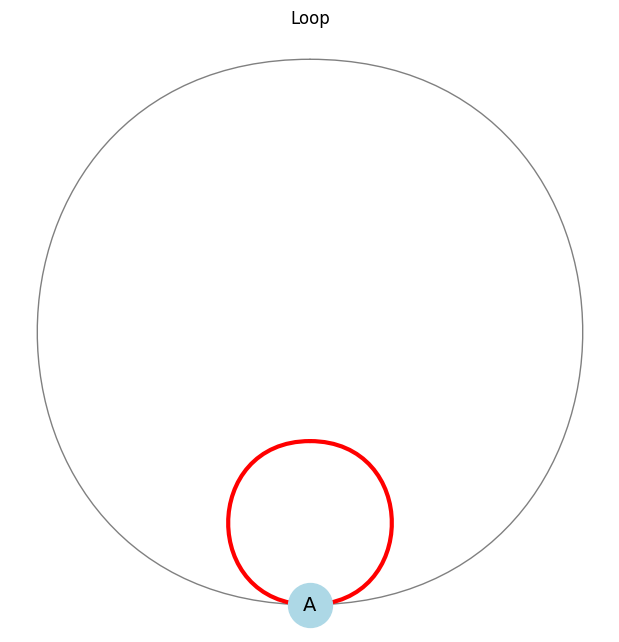

Description: An edge of the form (v, v) is called a loop.
Example: Edge (A, A) is a loop.
--------------------------------------------------------------------------------


In [7]:
# Example 3: Loop
G_loop = nx.Graph()
G_loop.add_edge('A', 'A')  # loop
plot_graph_with_description(
    G_loop, 
    [('A', 'A')], 
    "Loop", 
    "An edge of the form (v, v) is called a loop.", 
    "Edge (A, A) is a loop."
)
warnings.filterwarnings("ignore")



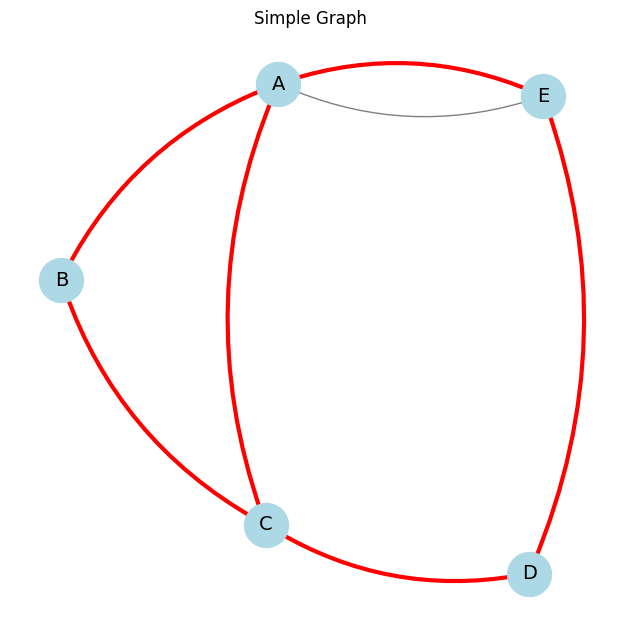

Description: A simple graph has no parallel edges or loops.
Example: Graph G with no parallel edges or loops.
--------------------------------------------------------------------------------


In [8]:
# Example 4: Simple Graph
plot_graph_with_description(
    G, 
    edges, 
    "Simple Graph", 
    "A simple graph has no parallel edges or loops.", 
    "Graph G with no parallel edges or loops."
)
warnings.filterwarnings("ignore")



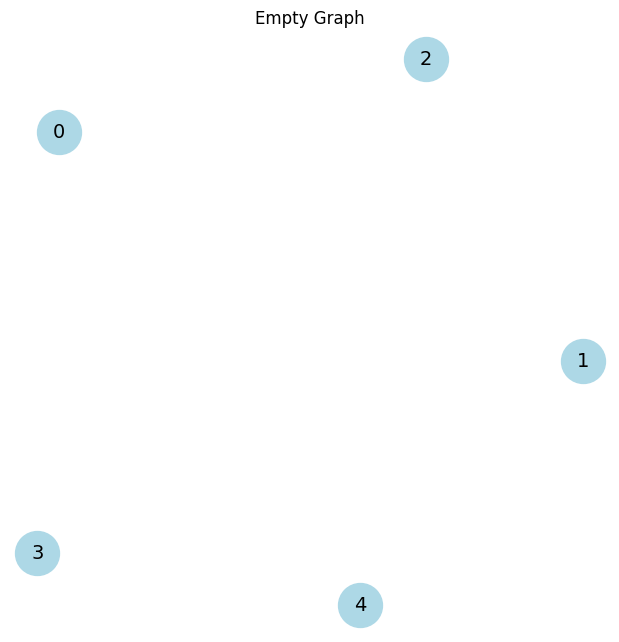

Description: A graph is empty if it has no edges.
Example: A graph with vertices A, B, C, D, E but no edges.
--------------------------------------------------------------------------------


In [9]:
# Example 5: Empty Graph
G_empty = nx.empty_graph(5)
plot_graph_with_description(
    G_empty, 
    [], 
    "Empty Graph", 
    "A graph is empty if it has no edges.", 
    "A graph with vertices A, B, C, D, E but no edges."
)

warnings.filterwarnings("ignore")



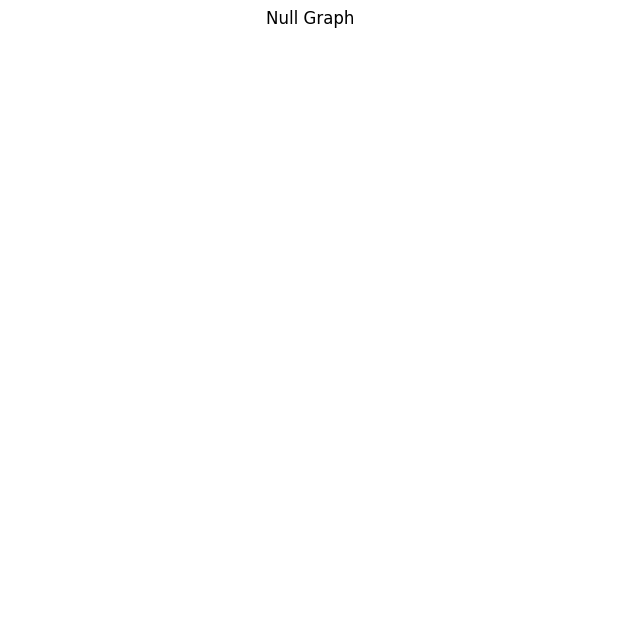

Description: A graph is a null graph if it has no vertices and no edges.
Example: A graph with no vertices and edges.
--------------------------------------------------------------------------------


In [10]:
# Example 6: Null Graph
G_null = nx.Graph()
plot_graph_with_description(
    G_null, 
    [], 
    "Null Graph", 
    "A graph is a null graph if it has no vertices and no edges.", 
    "A graph with no vertices and edges."
)
warnings.filterwarnings("ignore")



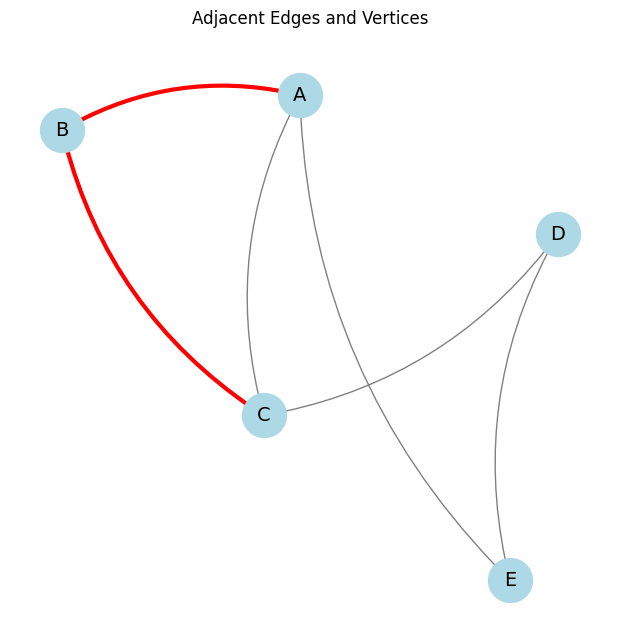

Description: Edges are adjacent if they share a vertex, and vertices are adjacent if they share an edge.
Example: Vertices A and B are adjacent because they share edge (A, B).
--------------------------------------------------------------------------------


In [11]:
# Example 7: Adjacent Edges and Vertices
plot_graph_with_description(
    G, 
    [('A', 'B'), ('B', 'C')], 
    "Adjacent Edges and Vertices", 
    "Edges are adjacent if they share a vertex, and vertices are adjacent if they share an edge.", 
    "Vertices A and B are adjacent because they share edge (A, B)."
)
warnings.filterwarnings("ignore")



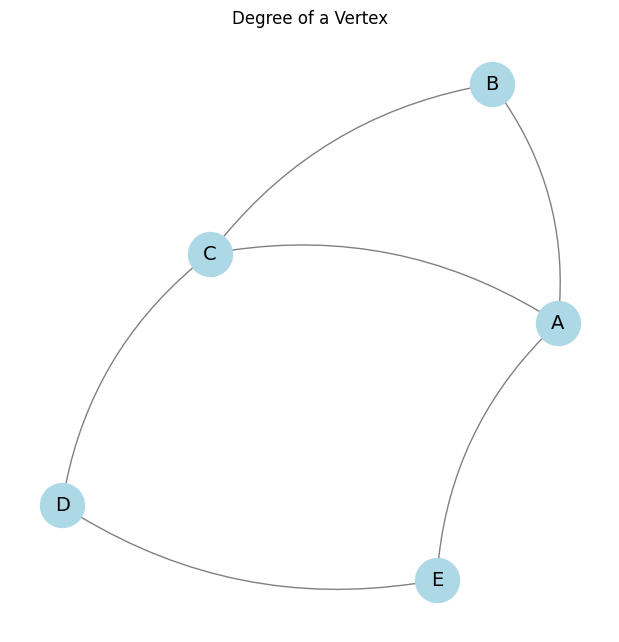

Description: The degree of a vertex is the number of edges connected to it. A loop counts twice.
Example: Vertex A has degree 3 in this graph (A connects to B, C, and E).
--------------------------------------------------------------------------------


In [12]:
# Example 8: Degree of a Vertex
plot_graph_with_description(
    G, 
    [], 
    "Degree of a Vertex", 
    "The degree of a vertex is the number of edges connected to it. A loop counts twice.", 
    "Vertex A has degree 3 in this graph (A connects to B, C, and E)."
)
warnings.filterwarnings("ignore")



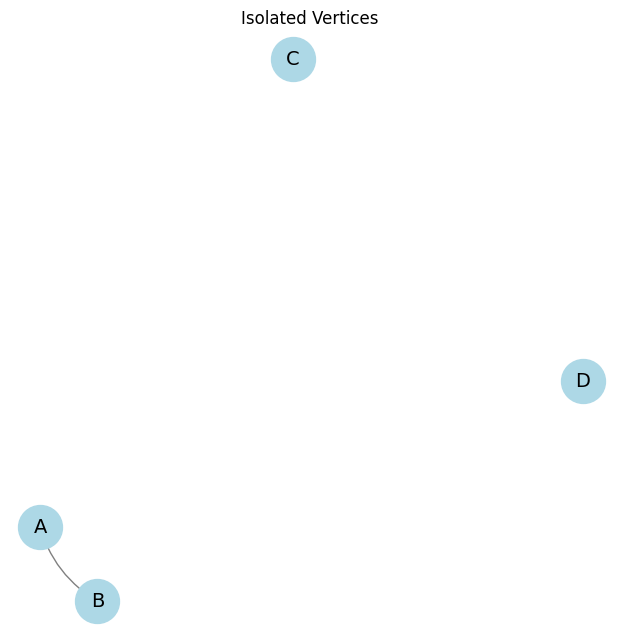

Description: Isolated vertices are vertices with degree 1.
Example: Vertices C and D are isolated.
--------------------------------------------------------------------------------


In [13]:
# Example 9: Isolated Vertices
G_isolated = nx.Graph()
G_isolated.add_nodes_from(['A', 'B', 'C', 'D'])
G_isolated.add_edge('A', 'B')
plot_graph_with_description(
    G_isolated, 
    [], 
    "Isolated Vertices", 
    "Isolated vertices are vertices with degree 1.", 
    "Vertices C and D are isolated."
)

warnings.filterwarnings("ignore")


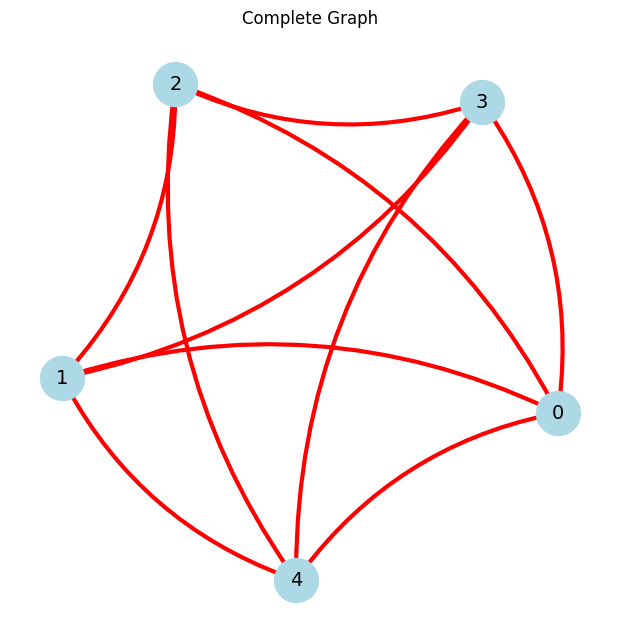

Description: A graph is complete if every possible edge between vertices exists.
Example: A complete graph with vertices A, B, C, D, E has all possible edges.
--------------------------------------------------------------------------------


In [14]:
# Example 10: Complete Graph
G_complete = nx.complete_graph(5)
plot_graph_with_description(
    G_complete, 
    list(G_complete.edges), 
    "Complete Graph", 
    "A graph is complete if every possible edge between vertices exists.", 
    "A complete graph with vertices A, B, C, D, E has all possible edges."
)
warnings.filterwarnings("ignore")



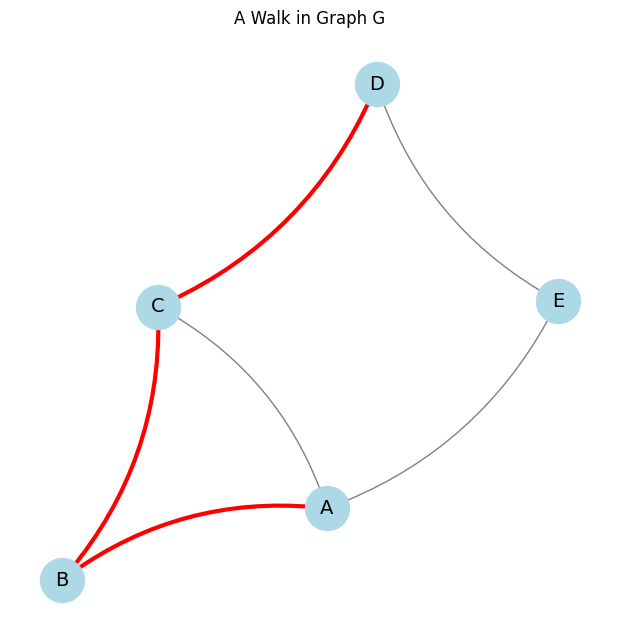

Description: A finite alternating sequence of vertices and edges in a graph.
Example: Moving from vertex A to B, then from B to C, and then from C to D.
--------------------------------------------------------------------------------


In [15]:
# Example 11: A Walk in Graph G
walk_edges = [('A', 'B'), ('B', 'C'), ('C', 'D')]
plot_graph_with_description(
    G, 
    walk_edges, 
    "A Walk in Graph G", 
    "A finite alternating sequence of vertices and edges in a graph.", 
    "Moving from vertex A to B, then from B to C, and then from C to D."
)

warnings.filterwarnings("ignore")


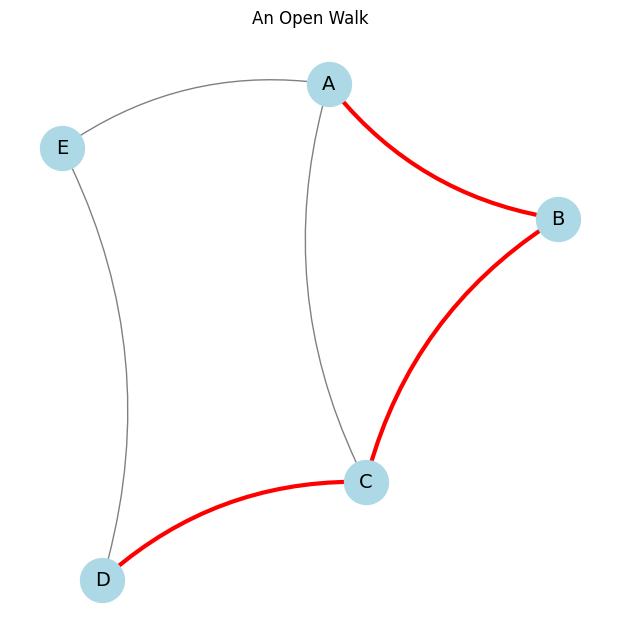

Description: A walk where the start and end vertices are different.
Example: Moving from A to B, then to C, and finally to D.
--------------------------------------------------------------------------------


In [16]:
# Example 12: Open Walk
open_walk_edges = [('A', 'B'), ('B', 'C'), ('C', 'D')]
plot_graph_with_description(
    G, 
    open_walk_edges, 
    "An Open Walk", 
    "A walk where the start and end vertices are different.", 
    "Moving from A to B, then to C, and finally to D."
)
# Suppress specific UserWarnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)



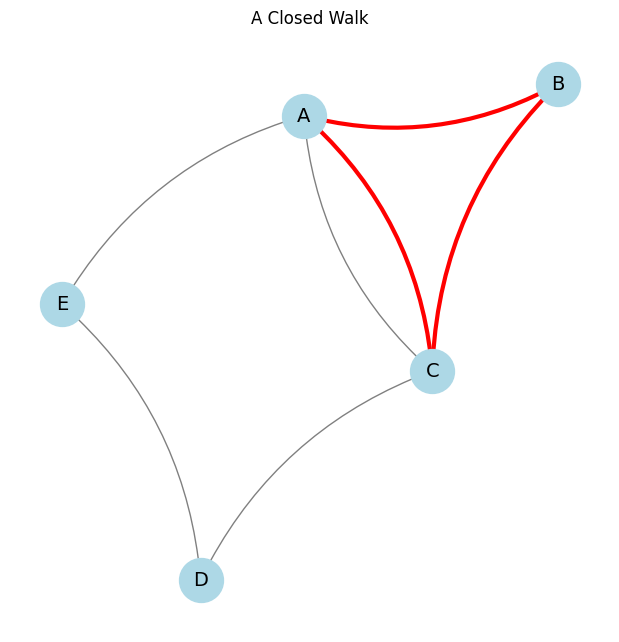

Description: A walk where the start and end vertices are the same.
Example: Starting at A, moving to B, then C, and back to A.
--------------------------------------------------------------------------------


In [17]:
# Example 13: Closed Walk
closed_walk_edges = [('A', 'B'), ('B', 'C'), ('C', 'A')]
plot_graph_with_description(
    G, 
    closed_walk_edges, 
    "A Closed Walk", 
    "A walk where the start and end vertices are the same.", 
    "Starting at A, moving to B, then C, and back to A."
)

warnings.filterwarnings("ignore")


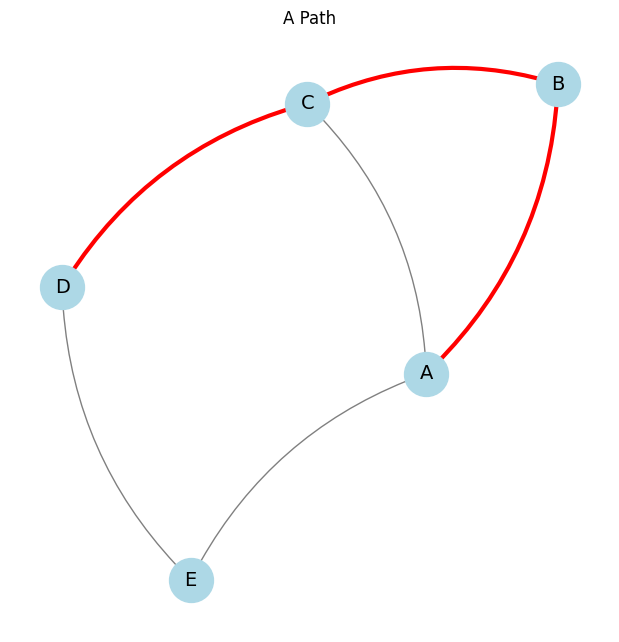

Description: A walk where no vertex is repeated (except for closed walks).
Example: Moving from A to B, then B to C, and finally to D.
--------------------------------------------------------------------------------


In [18]:
# Example 14: Path
path_edges = [('A', 'B'), ('B', 'C'), ('C', 'D')]
plot_graph_with_description(
    G, 
    path_edges, 
    "A Path", 
    "A walk where no vertex is repeated (except for closed walks).", 
    "Moving from A to B, then B to C, and finally to D."
)
warnings.filterwarnings("ignore")

